In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
training_sample= pd.read_csv("Finaldata_4_EDA.csv", sep=",")

In [3]:
training_sample.head()

,Unnamed: 0,I_REC_KEY,DATE_KEY,target,month,obs_date
0,2665486,141650292,31JAN2019,0,1,31JAN2019
1,946223,47743555,31JAN2019,0,1,31JAN2019
2,3053818,150557313,31JAN2019,0,1,31JAN2019
3,100856,10480411,31JAN2019,0,1,31JAN2019
4,2360013,127664122,31JAN2019,0,1,31JAN2019


In [4]:
training_sample.shape

(3000000, 6)

In [5]:
# appending the HH_KEY and CUST_KEY to training sample

# read the UC_CoBA_ACCT_CUST_HH_XREF
ref_file= pd.read_csv("UC_CoBA_ACCT_CUST_HH_XREF.txt", sep="|")
ref_file.drop('ACCT_KEY',axis=1,inplace=True)

In [6]:
ref_file.head()

,I_REC_KEY,CURR_CUST_KEY,CURR_HH_KEY
0,39155074,32777172.0,6520155.0
1,14005888,34896115.0,3407771.0
2,131963766,20040290.0,6593223.0
3,10190016,33908034.0,964223.0
4,131777109,61578406.0,6523463.0


In [7]:
ref_file.rename(columns={'CURR_CUST_KEY':'CUST_KEY', 'CURR_HH_KEY':'HH_KEY'}, inplace=True)

In [9]:
ref_file.shape

(20935738, 3)

In [10]:
training_app_keys=training_sample.merge(ref_file, how='inner', on='I_REC_KEY')

In [11]:
training_app_keys.shape

(3000000, 8)

In [12]:
#saved the appended file
#training_app_keys.to_csv('C:/Users/aditi/Documents/Courses/Sem 2/gradcs/Data/training_appended_keys.csv', index=False, header=True)

In [13]:
training_accts=list(training_app_keys.CUST_KEY)
training_df=training_app_keys[['I_REC_KEY','DATE_KEY','target','obs_date','CUST_KEY','HH_KEY']]

In [14]:
training_df.head()

,I_REC_KEY,DATE_KEY,target,obs_date,CUST_KEY,HH_KEY
0,141650292,31JAN2019,0,31JAN2019,67465891.0,76661394.0
1,47743555,31JAN2019,0,31JAN2019,24534901.0,10389099.0
2,150557313,31JAN2019,0,31JAN2019,69088060.0,77414231.0
3,10480411,31JAN2019,0,31JAN2019,25238009.0,1044097.0
4,127664122,31JAN2019,0,31JAN2019,26864354.0,10404178.0


In [15]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000000 entries, 0 to 2999999
Data columns (total 6 columns):
I_REC_KEY    int64
DATE_KEY     object
target       int64
obs_date     object
CUST_KEY     float64
HH_KEY       float64
dtypes: float64(2), int64(2), object(2)
memory usage: 160.2+ MB


In [23]:
df_sample = pd.read_table('C:/Users/aditi/Documents/Courses/Sem 2/gradcs/Data/UC_CoBA_CUST_SUMM_MONTHLY_15.txt', nrows=10)
df_sample_size = df_sample.memory_usage(index=True).sum()

my_chunk = (1000000000 / df_sample_size)/10
my_chunk = int(my_chunk//1) # we get the integer part
print (my_chunk)

df_chunk = pd.read_csv('C:/Users/aditi/Documents/Courses/Sem 2/gradcs/Data/UC_CoBA_CUST_SUMM_MONTHLY_15.txt', chunksize=my_chunk,sep="|",low_memory=False)
chunk_list = []  # append each chunk df here
 
# Each chunk is in df format
for chunk in df_chunk: 
    # perform data filtering
    chunk['CUST_KEY']=chunk['CUST_KEY'].astype(float)
    #chunk_filter = chunk[chunk['CUST_KEY'].isin(training_accts)]
    chunk_filter=chunk.merge(training_df, on=['CUST_KEY','DATE_KEY'], how='inner')
   
    # Once the data filtering is done, append the chunk to list
    chunk_list.append(chunk_filter)
   
# concat the list into dataframe
df_concat = pd.concat(chunk_list)

480769


In [28]:
df_concat.shape

(2888810, 56)

In [29]:
# save customer summary data corresponding to training data
df_concat.to_csv('C:/Users/aditi/Documents/Courses/Sem 2/gradcs/Data/cust_summ_train.csv', index=False, header=True)

In [31]:
cust_summ=df_concat
cust_summ.head()

,CUST_KEY,DATE_KEY,CONS_LOAN_ACCT_QTY,CONS_LOAN_BAL_AMT,CONS_LOAN_WAR_PCT,CONS_LOAN_IND,CONS_DEPOSIT_ACCT_QTY,CONS_DEPOSIT_BAL_AMT,CONS_DEPOSIT_IND,MORTGAGE_ACCT_QTY,...,GPR_ACCT_QTY,GPR_BAL_AMT,ID_ALERT_ACCT_QTY,EXPBKG_ACCT_QTY,EXPBKG_BAL_AMT,EXPBKG_IND,I_REC_KEY,target,obs_date,HH_KEY
0,18951717.0,30NOV2018,1,0,0.00,Y,2,3893,Y,0,...,0,0,1.0,0,0,N,107958503,0,30NOV2018,432350.0
1,18960136.0,30NOV2018,2,0,0.00,Y,3,111852,Y,0,...,0,0,1.0,0,0,N,8769070,0,30NOV2018,2144743.0
2,18966315.0,30NOV2018,1,462,24.99,Y,2,348,Y,0,...,0,0,1.0,0,0,N,77814767,0,30NOV2018,8412300.0
3,18969933.0,30NOV2018,0,0,0.00,N,1,28140,Y,0,...,0,0,NaN,0,0,N,31428597,0,30NOV2018,8378607.0
4,18982251.0,30NOV2018,0,0,0.00,N,3,239619,Y,0,...,0,0,NaN,0,0,N,49607535,0,30NOV2018,16460358.0


In [46]:
cust_summ.groupby(['obs_date']).sum().target

obs_date
28FEB2019    2393
30APR2019    2407
30JUN2019    2676
30NOV2018    8612
30SEP2019    2725
31AUG2019    3063
31DEC2018    6939
31JAN2019    2419
31JUL2019    2575
31MAR2019    2380
31MAY2019    2875
31OCT2019    3323
Name: target, dtype: int64

In [3]:
# read customer summary file
cust_summ_train=pd.read_csv('C:/Users/aditi/Documents/Courses/Sem 2/gradcs/Data/cust_summ_train.csv')

In [4]:
cust_summ_train.head()

,CUST_KEY,DATE_KEY,CONS_LOAN_ACCT_QTY,CONS_LOAN_BAL_AMT,CONS_LOAN_WAR_PCT,CONS_LOAN_IND,CONS_DEPOSIT_ACCT_QTY,CONS_DEPOSIT_BAL_AMT,CONS_DEPOSIT_IND,MORTGAGE_ACCT_QTY,...,GPR_ACCT_QTY,GPR_BAL_AMT,ID_ALERT_ACCT_QTY,EXPBKG_ACCT_QTY,EXPBKG_BAL_AMT,EXPBKG_IND,I_REC_KEY,target,obs_date,HH_KEY
0,18951717.0,30NOV2018,1,0,0.00,Y,2,3893,Y,0,...,0,0,1.0,0,0,N,107958503,0,30NOV2018,432350.0
1,18960136.0,30NOV2018,2,0,0.00,Y,3,111852,Y,0,...,0,0,1.0,0,0,N,8769070,0,30NOV2018,2144743.0
2,18966315.0,30NOV2018,1,462,24.99,Y,2,348,Y,0,...,0,0,1.0,0,0,N,77814767,0,30NOV2018,8412300.0
3,18969933.0,30NOV2018,0,0,0.00,N,1,28140,Y,0,...,0,0,NaN,0,0,N,31428597,0,30NOV2018,8378607.0
4,18982251.0,30NOV2018,0,0,0.00,N,3,239619,Y,0,...,0,0,NaN,0,0,N,49607535,0,30NOV2018,16460358.0


In [5]:
cust_summ_train2=cust_summ_train.drop(['CUST_KEY','DATE_KEY','HH_KEY','I_REC_KEY'], axis=1)

In [6]:
cust_summ_train2.head()

,CONS_LOAN_ACCT_QTY,CONS_LOAN_BAL_AMT,CONS_LOAN_WAR_PCT,CONS_LOAN_IND,CONS_DEPOSIT_ACCT_QTY,CONS_DEPOSIT_BAL_AMT,CONS_DEPOSIT_IND,MORTGAGE_ACCT_QTY,MORTGAGE_BAL_AMT,MORTGAGE_IND,...,GPR_IND,GPR_DIRECT_DEPOSIT_IND,GPR_ACCT_QTY,GPR_BAL_AMT,ID_ALERT_ACCT_QTY,EXPBKG_ACCT_QTY,EXPBKG_BAL_AMT,EXPBKG_IND,target,obs_date
0,1,0,0.00,Y,2,3893,Y,0,0,N,...,N,N,0,0,1.0,0,0,N,0,30NOV2018
1,2,0,0.00,Y,3,111852,Y,0,0,N,...,N,N,0,0,1.0,0,0,N,0,30NOV2018
2,1,462,24.99,Y,2,348,Y,0,0,N,...,N,N,0,0,1.0,0,0,N,0,30NOV2018
3,0,0,0.00,N,1,28140,Y,0,0,N,...,N,N,0,0,NaN,0,0,N,0,30NOV2018
4,0,0,0.00,N,3,239619,Y,0,0,N,...,N,N,0,0,NaN,0,0,N,0,30NOV2018


In [7]:
# histograms for continuous variables
# countplot for categorical
# correlation analysis - correlation coefficient (need better presentation)
# missing values - done
# outliers- done for few
# summary statistics - done

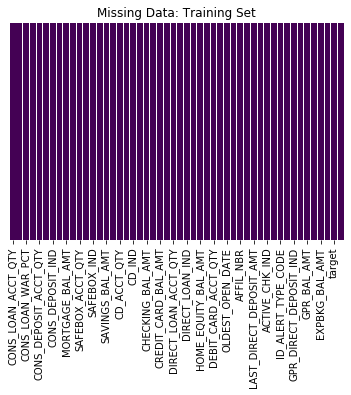

In [42]:
# Missing Values
sns.heatmap(cust_summ_train2.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data: Training Set')
plt.show()

In [33]:
cust_summ_train2.isnull().sum()

CONS_LOAN_ACCT_QTY               0
CONS_LOAN_BAL_AMT                0
CONS_LOAN_WAR_PCT                0
CONS_LOAN_IND                    0
CONS_DEPOSIT_ACCT_QTY            0
CONS_DEPOSIT_BAL_AMT             0
CONS_DEPOSIT_IND                 0
MORTGAGE_ACCT_QTY                0
MORTGAGE_BAL_AMT                 0
MORTGAGE_IND                     0
SAFEBOX_ACCT_QTY                 0
SAFEBOX_BAL_AMT                  0
SAFEBOX_IND                      0
SAVINGS_ACCT_QTY                 0
SAVINGS_BAL_AMT                  0
SAVINGS_IND                      0
CD_ACCT_QTY                      0
CD_BAL_AMT                       0
CD_IND                           0
CHECKING_ACCT_QTY                0
CHECKING_BAL_AMT                 0
CREDIT_CARD_ACCT_QTY             0
CREDIT_CARD_BAL_AMT              0
CREDIT_CARD_IND                  0
DIRECT_LOAN_ACCT_QTY             0
DIRECT_LOAN_BAL_AMT              0
DIRECT_LOAN_IND                  0
HOME_EQUITY_ACCT_QTY             0
HOME_EQUITY_BAL_AMT 

In [7]:
mv_pct=cust_summ_train2.ID_ALERT_ACCT_QTY.isnull().sum()/(cust_summ_train2.ID_ALERT_ACCT_QTY.isnull().sum()+cust_summ_train2.ID_ALERT_ACCT_QTY.count())
mv_pct*100
# since we observe more than 85% values as missing within ID_ALERT_ACCT_QTY and IXI_CLUSTER_CODE, we will drop these columns

87.51025508773509

In [8]:
cust_summ_train2.drop(['ID_ALERT_ACCT_QTY','IXI_CLUSTER_CODE'], axis=1, inplace=True)

In [9]:
#summary stats
cust_summ_train2.describe().round(2)

,CONS_LOAN_ACCT_QTY,CONS_LOAN_BAL_AMT,CONS_LOAN_WAR_PCT,CONS_DEPOSIT_ACCT_QTY,CONS_DEPOSIT_BAL_AMT,MORTGAGE_ACCT_QTY,MORTGAGE_BAL_AMT,SAFEBOX_ACCT_QTY,SAFEBOX_BAL_AMT,SAVINGS_ACCT_QTY,...,HOME_EQUITY_BAL_AMT,DEBIT_CARD_ACCT_QTY,BRANCH_NBR,AFFIL_NBR,LAST_DIRECT_DEPOSIT_AMT,GPR_ACCT_QTY,GPR_BAL_AMT,EXPBKG_ACCT_QTY,EXPBKG_BAL_AMT,target
count,2888810.00,2888810.00,2888810.00,2888810.00,2.888810e+06,2888810.00,2888810.00,2888810.00,2888810.00,2888810.00,...,2888810.00,2888810.00,2887907.00,2887907.00,2.888810e+06,2888810.00,2888810.00,2888810.00,2888810.00,2888810.00
mean,0.55,15110.84,3.60,2.01,2.486550e+04,0.09,12157.53,0.03,0.35,0.69,...,1832.12,1.19,9006.50,35.52,2.940708e+04,0.12,5.94,0.02,5.22,0.01
std,0.93,90402.47,7.13,1.72,4.000671e+05,0.31,66773.42,0.19,8.56,2.37,...,46098.04,1.27,15544.78,20.33,8.383530e+05,0.36,86.72,0.17,255.95,0.12
min,0.00,-49368.00,-143.24,0.00,-1.220600e+05,0.00,0.00,0.00,0.00,0.00,...,-2180.00,0.00,2.00,1.00,0.000000e+00,0.00,-16736.00,0.00,-21429.00,0.00
25%,0.00,0.00,0.00,1.00,2.910000e+02,0.00,0.00,0.00,0.00,0.00,...,0.00,1.00,555.00,23.00,0.000000e+00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,2.00,1.959000e+03,0.00,0.00,0.00,0.00,1.00,...,0.00,1.00,1852.00,36.00,7.210000e+02,0.00,0.00,0.00,0.00,0.00
75%,1.00,204.00,3.88,3.00,1.103700e+04,0.00,0.00,0.00,0.00,1.00,...,0.00,2.00,5181.00,51.00,1.646000e+03,0.00,0.00,0.00,0.00,0.00
max,55.00,13399101.00,1023.47,155.00,2.524270e+08,37.00,12805006.00,41.00,5900.00,221.00,...,7600000.00,240.00,70303.00,70.00,1.000000e+08,4.00,19512.00,14.00,194794.00,1.00


In [49]:
# categorical variables: CONS_LOAN_IND, CONS_DEPOSIT_IND,MORTGAGE_IND,SAVINGS_IND, CD_IND, CREDIT_CARD_IND, DIRECT_LOAN_IND,
#HOME_EQUITY_IND, DEBIT_CARD_IND, BRANCH_NBR, OLDEST_OPEN_DATE, AFFIL_NBR,DIRECT_DEP_IND, ID_ALERT_IND, ACTIVE_CHK_IND, HABITUAL_OD_IND,
#ID_ALERT_TYPE_CODE, GPR_IND, 'GPR_DIRECT_DEPOSIT_IND','EXPBKG_IND', 'obs_date'
cust_summ_train2.columns

Index(['CONS_LOAN_ACCT_QTY', 'CONS_LOAN_BAL_AMT', 'CONS_LOAN_WAR_PCT',
       'CONS_LOAN_IND', 'CONS_DEPOSIT_ACCT_QTY', 'CONS_DEPOSIT_BAL_AMT',
       'CONS_DEPOSIT_IND', 'MORTGAGE_ACCT_QTY', 'MORTGAGE_BAL_AMT',
       'MORTGAGE_IND', 'SAFEBOX_ACCT_QTY', 'SAFEBOX_BAL_AMT', 'SAFEBOX_IND',
       'SAVINGS_ACCT_QTY', 'SAVINGS_BAL_AMT', 'SAVINGS_IND', 'CD_ACCT_QTY',
       'CD_BAL_AMT', 'CD_IND', 'CHECKING_ACCT_QTY', 'CHECKING_BAL_AMT',
       'CREDIT_CARD_ACCT_QTY', 'CREDIT_CARD_BAL_AMT', 'CREDIT_CARD_IND',
       'DIRECT_LOAN_ACCT_QTY', 'DIRECT_LOAN_BAL_AMT', 'DIRECT_LOAN_IND',
       'HOME_EQUITY_ACCT_QTY', 'HOME_EQUITY_BAL_AMT', 'HOME_EQUITY_IND',
       'DEBIT_CARD_ACCT_QTY', 'DEBIT_CARD_IND', 'OLDEST_OPEN_DATE',
       'BRANCH_NBR', 'AFFIL_NBR', 'DIRECT_DEP_IND', 'LAST_DIRECT_DEPOSIT_AMT',
       'ID_ALERT_IND', 'ACTIVE_CHK_IND', 'HABITUAL_OD_IND',
       'ID_ALERT_TYPE_CODE', 'GPR_IND', 'GPR_DIRECT_DEPOSIT_IND',
       'GPR_ACCT_QTY', 'GPR_BAL_AMT', 'EXPBKG_ACCT_QTY', 'EXPBKG_BAL_AM

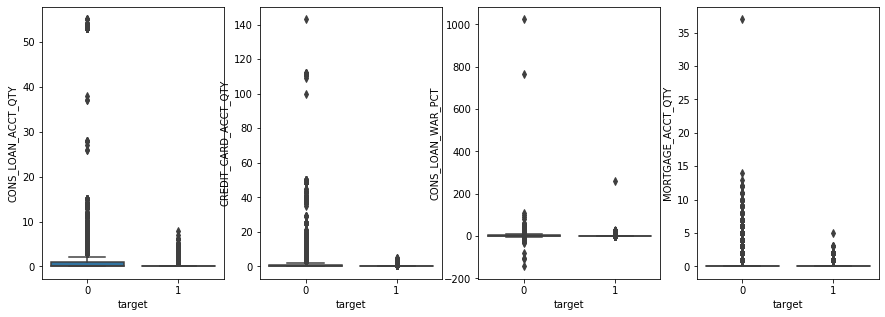

In [50]:
#outliers for top 5 corelated variables 
fig, axs = plt.subplots(ncols=4, figsize=(15,5))
sns.boxplot(x='target', y='CONS_LOAN_ACCT_QTY',data=cust_summ_train2, ax=axs[0])
sns.boxplot(x='target', y="CREDIT_CARD_ACCT_QTY",data=cust_summ_train2, ax=axs[1])
sns.boxplot(x='target', y="CONS_LOAN_WAR_PCT",data=cust_summ_train2, ax=axs[2])
sns.boxplot(x='target', y="MORTGAGE_ACCT_QTY",data=cust_summ_train2, ax=axs[3])
#sns.boxplot(x='target', y="HOME_EQUITY_ACCT_QTY",data=cust_summ_train2)
#sns.boxplot(x='target', y="CREDIT_CARD_BAL_AMT",data=cust_summ_train2)
#sns.boxplot(x='target', y="MORTGAGE_BAL_AMT",data=cust_summ_train2)


# too many outliers: suggested treatment- bin the variables? capping and flooring? can we ask the crowd this?


In [11]:
# correlation

corr=cust_summ_train2.corr()
corr['target'].sort_values()

CONS_LOAN_ACCT_QTY        -0.037290
CREDIT_CARD_ACCT_QTY      -0.028707
CONS_LOAN_WAR_PCT         -0.025220
MORTGAGE_ACCT_QTY         -0.024359
HOME_EQUITY_ACCT_QTY      -0.018221
CREDIT_CARD_BAL_AMT       -0.015424
MORTGAGE_BAL_AMT          -0.015049
CONS_LOAN_BAL_AMT         -0.013742
SAVINGS_ACCT_QTY          -0.013024
SAFEBOX_ACCT_QTY          -0.010806
CONS_DEPOSIT_ACCT_QTY     -0.010607
DIRECT_LOAN_ACCT_QTY      -0.009411
CHECKING_ACCT_QTY         -0.008099
CD_ACCT_QTY               -0.007925
CHECKING_BAL_AMT          -0.005290
CONS_DEPOSIT_BAL_AMT      -0.004842
LAST_DIRECT_DEPOSIT_AMT   -0.004196
HOME_EQUITY_BAL_AMT       -0.003449
DIRECT_LOAN_BAL_AMT       -0.002992
CD_BAL_AMT                -0.002542
SAVINGS_BAL_AMT           -0.001907
SAFEBOX_BAL_AMT           -0.001867
GPR_BAL_AMT               -0.001718
EXPBKG_BAL_AMT            -0.000209
AFFIL_NBR                  0.008584
DEBIT_CARD_ACCT_QTY        0.008925
GPR_ACCT_QTY               0.012980
EXPBKG_ACCT_QTY            0

In [15]:
#correlogram
df = sns.load_dataset('cust_summ_train2')
sns.pairplot(df, kind="scatter", hue="target", markers=["o", "D"], palette="Set2")
plt.show()

#rectify the error

HTTPError: HTTP Error 404: Not Found

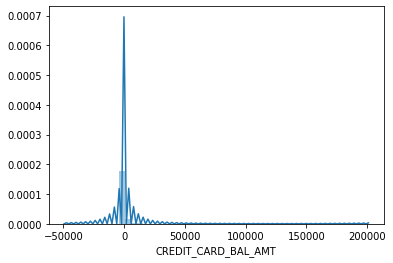

In [14]:
sns.distplot(cust_summ_train2["CREDIT_CARD_BAL_AMT"])

In [ ]:
# categorical variables: CONS_LOAN_IND, CONS_DEPOSIT_IND,MORTGAGE_IND,
#SAVINGS_IND, CD_IND, CREDIT_CARD_IND, 
#DIRECT_LOAN_IND,HOME_EQUITY_IND, DEBIT_CARD_IND, 
#BRANCH_NBR, OLDEST_OPEN_DATE, AFFIL_NBR,
#DIRECT_DEP_IND, ID_ALERT_IND, ACTIVE_CHK_IND, 
#HABITUAL_OD_IND, ID_ALERT_TYPE_CODE, GPR_IND, 
#'GPR_DIRECT_DEPOSIT_IND','EXPBKG_IND', 'obs_date'

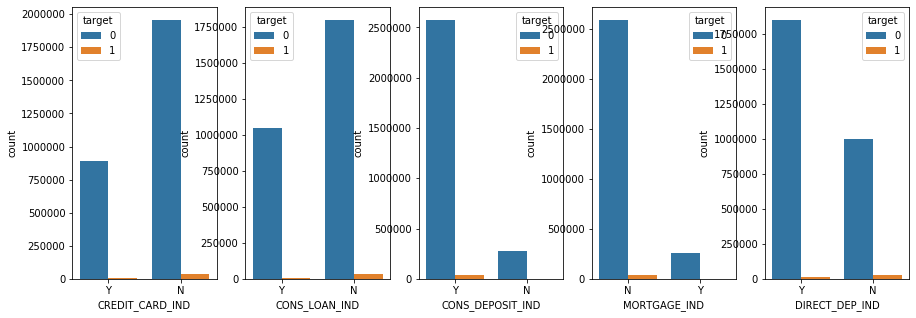

In [49]:
fig, axs = plt.subplots(ncols=5, figsize=(15,5))
sns.countplot('CREDIT_CARD_IND', hue='target', data=cust_summ_train2, ax=axs[0])
sns.countplot('CONS_LOAN_IND', hue='target', data=cust_summ_train2, ax=axs[1])
sns.countplot('CONS_DEPOSIT_IND', hue='target', data=cust_summ_train2, ax=axs[2])
sns.countplot('MORTGAGE_IND', hue='target', data=cust_summ_train2, ax=axs[3])
sns.countplot('DIRECT_DEP_IND', hue='target', data=cust_summ_train2, ax=axs[4])